# Libraries

In [ ]:
#Basic scientific math, data shape, and data file libraries for data pre-processing
import io 
import numpy as np 
import pandas as pd

#Plotting 
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

# Data loading 

First, we will mount the drive & load the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
robo_bohr = pd.read_csv('/content/gdrive/My Drive/DS/molecules/roboBohr.csv')
robo_bohr 

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,16268,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,12.557785,12.557113,10.855517,10.612536,10.606837,10.606647,10.575946,10.546340,9.328498,9.319485,9.295251,8.103619,8.059486,6.733081,6.025705,5.353745,5.345835,5.343937,5.200625,5.190235,5.176243,5.175604,4.741453,4.352078,4.247954,4.224297,4.218675,4.030840,3.982557,3.980375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74976,-8.876123
16238,16269,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.

# Data pre-processing

We define the design matrix containing all the features except the 'Eat' column, which stores energy of atomization per molecule. We assign 'Eat' to y because this is the target objects with the labels we want our model to use for predictions. Then, X is standardize for consistency accross values on the matrix and y is centralized.

In [ ]:
X = robo_bohr.drop(['Eat'], axis = 1)
y = robo_bohr['Eat']

In [ ]:
standardize = StandardScaler()
y_center = StandardScaler(with_std = False)

In [ ]:
X= standardize.fit_transform(X)
X = pd.DataFrame(X)

Review that values were standardize on X

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276
0,-1.732434,-0.372795,-0.534448,-1.043596,-0.936145,-0.855299,-0.806195,-0.695008,-0.583679,-0.468653,-0.349884,-0.221627,-0.065608,0.062540,0.179290,0.300685,0.420515,0.007942,0.092473,-0.207349,-0.360969,-0.549788,-0.463998,-0.370329,-0.292462,-0.221652,-0.164753,-0.101778,-0.057160,0.008425,0.082285,0.136817,0.191847,0.237371,0.260036,0.303121,0.323988,0.367307,0.206235,0.107752,...,-0.049017,-0.049018,-0.049015,5.205799,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,5.897061,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,6.699355,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,7.794655,-0.049018,-0.049018,-0.049018,-0.049017,9.071511,-0.049014,-0.049015,-0.049013,11.309499,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345475
1,-1.732221,-0.372795,-0.207476,-0.253760,-0.098378,0.130369,0.491641,0.699988,0.930156,0.567022,0.561288,0.749366,0.739378,0.232981,0.321935,0.411264,0.530913,0.643447,0.605935,0.240441,0.334565,0.395303,0.276617,0.257720,0.346045,0.225058,0.036131,0.073811,0.126871,0.186834,0.256199,0.310968,0.357017,0.410245,0.424948,0.422109,0.472768,0.520711,0.463869,0.430216,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345432
2,-1.732008,-0.372795,-0.532992,-1.038028,-0.944372,-0.866204,-0.819541,-0.722963,-0.637582,-1.053761,-1.517533,-1.829122,-1.629004,-1.514467,-1.388161,-1.251650,-1.155949,-1.020643,-1.141414,-1.214787,-1.128101,-1.050987,-1.008263,-0.989126,-0.931647,-0.986079,-1.058433,-1.042555,-1.015427,-1.130550,-1.079852,-1.529368,-1.492713,-1.453857,-1.415615,-1.374569,-1.336446,-1.291267,-1.232299,-1.190506,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345390
3,-1.731796,-0.372795,-0.527745,-0.339355,-0.102870,0.123643,0.486547,-0.662823,-0.546362,-0.429896,-0.324998,-0.195200,-0.041307,0.068610,0.144388,0.246355,-0.106192,0.024568,0.135129,0.240300,0.289112,-0.190781,-0.191796,-0.195257,-0.114170,-0.215174,-0.153827,-0.088114,-0.075143,-0.012344,-0.016563,-0.058260,-0.270062,-0.223518,-0.178788,-0.141069,-0.437828,-0.393460,-0.361642,-0.317606,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345262
4,-1.731583,-0.372795,-0.526820,-0.339746,-0.102590,0.117769,-0.791526,-0.680220,-0.577064,-1.001983,-0.913487,-0.852245,-1.287434,-1.302146,-1.162057,-1.063128,-1.094284,-0.962998,-1.084527,-1.013084,-1.434970,-1.361098,-1.291608,-1.259182,-1.204453,-1.276033,-1.243245,-1.400157,-1.649788,-1.641613,-1.578737,-1.529424,-1.493311,-1.454340,-1.415910,-1.374873,-1.336843,-1.292126,-1.233056,-1.191459,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049

Review values were centralize on the target labels for predictions stored on the vector called 'y'

In [ ]:
y -= np.mean(y)
y

0       -7.834793
1        1.017950
2        1.802350
3       -2.597469
4        2.641829
           ...   
16237    2.302846
16238   -1.926299
16239   -5.622495
16240   -2.156118
16241   -2.157726
Name: Eat, Length: 16242, dtype: float64

# Model assumptions 

* (i) Each molecule has to be composed of a subset of the elements from the set C,H, N, O, P and S (CHNOPS). 
* (ii) Each molecule must have at least 2, at most 50 atoms.
* (iii) The maximum distance between two atoms in a molecule must not exceed 25 a0 (a0 = 0.529 ˚A, i.e. Bohr radius), for convergence of plane-wave calculations, where each molecule
is placed in a cubic box of side length 30 a0.
*  (iv) There must be an even number of electrons
in the molecule.
<br>
<br>
Applying these criteria to the first 75,000 entries in the PubChem database
leads to a subset of 16,242 molecules, whose structure data files (SDF) are converted into
input files for electronic structure calculations
<br>
These are author's assumptions for modeling design

## Deliverable 1

Let's first illustrate the effect of the tuning parameter on the inferred ridge regression
coefficients by generating a plot of 1275 lines (one for each
of the 𝑝 = 1275 features), with the 𝑦-axis as 𝛽̂
𝑗
, 𝑗 = 1,2, …,1275, and the 𝑥-axis the corresponding
log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗

<br>
Note: Without the log scaling of the tuning parameter, the plot will look distorted. 


In [ ]:
lambdas = [10e-2, 10e-1, 10e0, 10e1, 10e2,10e3,10e4]
beta_list = []

for lamb in lambdas:
  ridge = Ridge(alpha = lamb, max_iter = 1000)
  ridge.fit(X,y)
  beta_list.append(ridge.coef_)

No handles with labels found to put in legend.


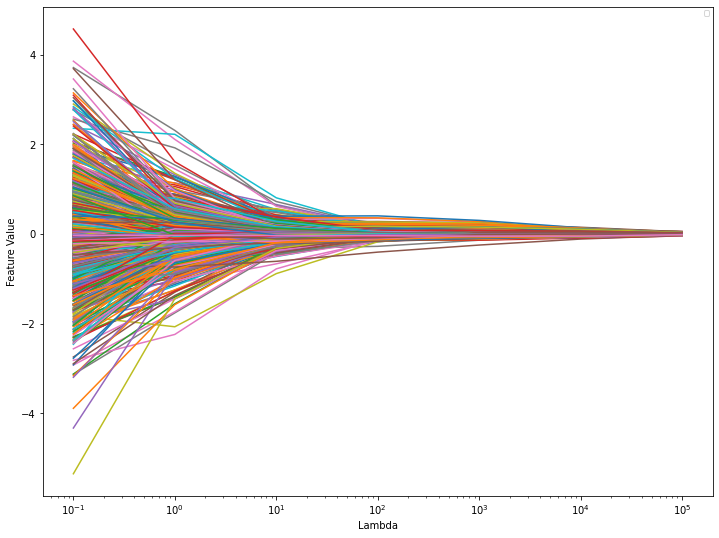

In [ ]:
betas = pd.DataFrame(beta_list)
betas.index = lambdas

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Feature Value')
plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.show()

## Deliverable 2

Then, we illustrate the effect of the tuning parameter on the cross-validation error by generating a plot with the 𝑦-axis as CV error, and the 𝑥- axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. 
<br>
Note: Without the log scaling of the tuning parameter, the plot will look distorted.

In [ ]:
ridge = Ridge(max_iter = 1000)

parameters ={'alpha': [1e-2,1e-1,1,10,1e2,1e3,1e4]}

mse = make_scorer(mean_squared_error, greater_is_better = False)

ridge_regressor = GridSearchCV(ridge,parameters, scoring = mse, cv = 5, refit = False)

ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

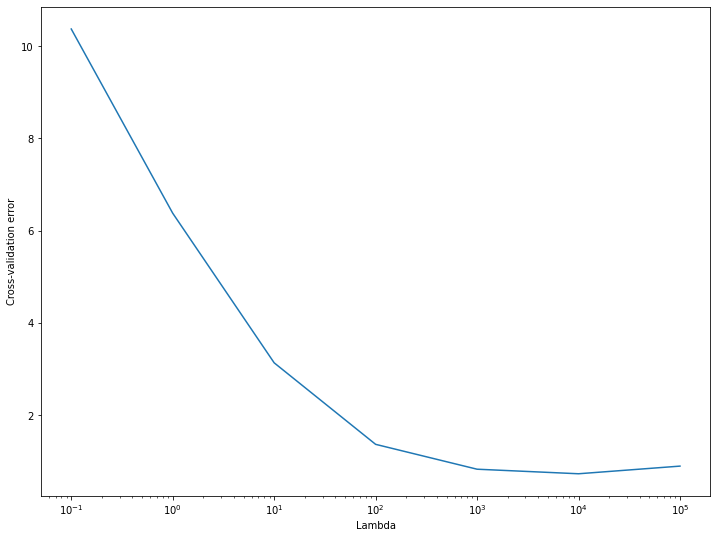

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(lambdas, np.absolute(ridge_regressor.cv_results_['mean_test_score']))
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.show()

## Deliverable 3

Then, we indicate the value of 𝜆 that generated the smallest CV(5) error

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) 

{'alpha': 1000.0}
-0.7306871403537858


Comments:
<br>
The alpha value of 1000 suggests that this is the tuning parameter lambda that will generate the model with the lowest cross validation error. From the graph above, 10,000 seems to produce the lowest error. The difference may be because, usually, we want the simplest possible model with the lowest possible cross-validation error. 
<br>
<br>
The second value for 'ridge_regressor.best_score_' is the mean cross-validated score of the best_estimator. The mean can be positive or negative. This served as an additional metric to describe the best predictor. 
<br>
Personal note for possible future updates: Maybe displaying the mean square error may be more informative

## Deliverable 4

 Given the optimal 𝜆, we will retrain the model on the entire dataset of 𝑁 = 16242
observations and provide the estimates of the 𝑝 = 1275 best-fit model parameters.

In [ ]:
ridge = Ridge(alpha=1000)
print(ridge.fit(X,y))
print("Ridge parameters:",ridge.get_params(deep=True))
print("Ridge score using the whole dataset:",ridge.score(X, y, sample_weight=None))

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge parameters: {'alpha': 1000, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Ridge score using the whole dataset: 0.955985971627623


The score suggests the trained model can make accurate predictions approximately 95.6% of the times.

Note: 
* The pseudocode, algorithm and deliverables, was designed and facilitated by Michael DeGiorgio, Ph.D., Associate Professor. <br>
Department of Computer and Electrical Engineering and Computer Science. <br>
Instructor of CAP 5652 Computational Foundations of AI offered in Fall, 2020
* The code design was generated by working with colleagues from the Computational Foundations of AI course. 
* Consultations and feedback received from Angelica Whitney, Michael DeGiorgio, and Henry Hetzfeld
* Conceptual consultations with members of the group project: Sergio Sempertegui, Joseph McKinley, and Fernanda Jongewaard de Boer
* In my opinion, this is a sufficient, initial approach to analyze the data before jumpting to the regression neural network algorithm
